# Webscraping MyAnimeList using Python

As I am a big fan of anime and manga, in this project I will be scraping the top anime and mangas from [MyAnimeList](https://myanimelist.net/) which is a site containing information about all of anime and manga. It would be fun.

In [4]:
# Loading required libraries
import requests
import os
import csv
from bs4 import BeautifulSoup
import re
import time
import pandas as pd

from IPython.display import display as disp, Image

## Exploring the html tags

In [9]:
URL = "https://myanimelist.net/topanime.php"

In [11]:
response = requests.get(URL)

In [12]:
parser = BeautifulSoup(response.text, "html.parser")

In [13]:
# Extract headers
headers = parser.select("tr.table-header")[0]

In [14]:
headers.text

'RankTitleScoreYour ScoreStatus'

In [15]:
anime_tags = parser.select("tr.ranking-list")

In [16]:
type(anime_tags)

bs4.element.ResultSet

In [17]:
anime_tags

[<tr class="ranking-list">
 <td class="rank ac" valign="top">
 <span class="lightLink top-anime-rank-text rank1">1</span>
 </td>
 <td class="title al va-t word-break">
 <a class="hoverinfo_trigger fl-l ml12 mr8" href="https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood" id="#area5114" rel="#info5114">
 <img alt="Anime: Fullmetal Alchemist: Brotherhood" border="0" class="lazyload" data-src="https://cdn.myanimelist.net/r/50x70/images/anime/1208/94745.jpg?s=7892d01b6c74f1bf945f7a3ff3bb1f6a" data-srcset="https://cdn.myanimelist.net/r/50x70/images/anime/1208/94745.jpg?s=7892d01b6c74f1bf945f7a3ff3bb1f6a 1x, https://cdn.myanimelist.net/r/100x140/images/anime/1208/94745.jpg?s=5ec18639199f2c60b60009f34222228d 2x" height="70" width="50">
 </img></a>
 <div class="detail"><div id="area5114">
 <div class="hoverinfo" id="info5114" rel="a5114"></div>
 </div>
 <div class="di-ib clearfix"><h3 class="hoverinfo_trigger fl-l fs14 fw-b anime_ranking_h3"><a href="https://myanimelist.net/anim

## Extracting Ranks

In [18]:
# Extract rankings
ranks_html = parser.select("td[class='rank ac']")

In [19]:
ranks = [rank.text.strip() for rank in ranks_html]

In [20]:
print(ranks)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50']


In [21]:
parser.select("td[class='title al va-t word-break']")[0]

<td class="title al va-t word-break">
<a class="hoverinfo_trigger fl-l ml12 mr8" href="https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood" id="#area5114" rel="#info5114">
<img alt="Anime: Fullmetal Alchemist: Brotherhood" border="0" class="lazyload" data-src="https://cdn.myanimelist.net/r/50x70/images/anime/1208/94745.jpg?s=7892d01b6c74f1bf945f7a3ff3bb1f6a" data-srcset="https://cdn.myanimelist.net/r/50x70/images/anime/1208/94745.jpg?s=7892d01b6c74f1bf945f7a3ff3bb1f6a 1x, https://cdn.myanimelist.net/r/100x140/images/anime/1208/94745.jpg?s=5ec18639199f2c60b60009f34222228d 2x" height="70" width="50">
</img></a>
<div class="detail"><div id="area5114">
<div class="hoverinfo" id="info5114" rel="a5114"></div>
</div>
<div class="di-ib clearfix"><h3 class="hoverinfo_trigger fl-l fs14 fw-b anime_ranking_h3"><a href="https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood" id="#area5114" rel="#info5114">Fullmetal Alchemist: Brotherhood</a></h3><div class="icon-watch2"

## Extracting Anime page links

In [22]:
anime_info = parser.select("td[class='title al va-t word-break']")

In [23]:
# # Extract url link
# anime_info[0].find('a')['href']

In [24]:
# Extract url links for all anime
def extract_anime_links(a_tags):
    links = []
    for tag in a_tags:
        tag = str(tag)
        pattern = r'href=(\S+)'
        link = re.findall(pattern, tag)[0][1:-1]
        links.append(link)
        
    return links

In [25]:
a_tags = [info.a for info in anime_info]

In [26]:
anime_links = extract_anime_links(a_tags)

In [27]:
anime_links[:10]

['https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood',
 'https://myanimelist.net/anime/9253/Steins_Gate',
 'https://myanimelist.net/anime/41467/Bleach__Sennen_Kessen-hen',
 'https://myanimelist.net/anime/28977/Gintama°',
 'https://myanimelist.net/anime/43608/Kaguya-sama_wa_Kokurasetai__Ultra_Romantic',
 'https://myanimelist.net/anime/38524/Shingeki_no_Kyojin_Season_3_Part_2',
 'https://myanimelist.net/anime/51535/Shingeki_no_Kyojin__The_Final_Season_-_Kanketsu-hen',
 'https://myanimelist.net/anime/9969/Gintama',
 'https://myanimelist.net/anime/39486/Gintama__The_Final',
 'https://myanimelist.net/anime/11061/Hunter_x_Hunter_2011']

## Extracting Anime images

In [28]:
# # Extract anime image links
# anime_info[0].find('img')['data-srcset'].split(', ')[1][:-3]

In [29]:
# Extract image links for all anime
def extract_img_links(img_tags):
    links = []
    for tag in img_tags:
        tag = str(tag)
        pattern = r'https\S+'
        link = re.findall(pattern, tag)[2]
        links.append(link)
        
    return links

In [30]:
img_tags = [info.img for info in anime_info]

In [31]:
img_links = extract_img_links(img_tags)

In [32]:
img_links[:10]

['https://cdn.myanimelist.net/r/100x140/images/anime/1208/94745.jpg?s=5ec18639199f2c60b60009f34222228d',
 'https://cdn.myanimelist.net/r/100x140/images/anime/1935/127974.jpg?s=a0c19821033ace3af10310a253a9e85b',
 'https://cdn.myanimelist.net/r/100x140/images/anime/1908/135431.jpg?s=b2907feb4a5b5797b2fabdfe87fe9fae',
 'https://cdn.myanimelist.net/r/100x140/images/anime/3/72078.jpg?s=bb26d45bb75e13601e1b8029f717c2b0',
 'https://cdn.myanimelist.net/r/100x140/images/anime/1160/122627.jpg?s=e4e56950556c022515bea0f8936ce541',
 'https://cdn.myanimelist.net/r/100x140/images/anime/1517/100633.jpg?s=63aa0647fb4eba3fd80288489f0a64a4',
 'https://cdn.myanimelist.net/r/100x140/images/anime/1279/131078.jpg?s=1b0db37795fa4240d5b66641643f76bb',
 'https://cdn.myanimelist.net/r/100x140/images/anime/4/50361.jpg?s=0fde0801daa3b436029146f401e5e77f',
 'https://cdn.myanimelist.net/r/100x140/images/anime/1245/116760.jpg?s=8fc5f4b436ee45307a882948a5e768ac',
 'https://cdn.myanimelist.net/r/100x140/images/anime/13

## Getting Anime info

In [33]:
anime_info[0].text

'\n\n\n\n\n\n\nFullmetal Alchemist: Brotherhood\n        TV (64 eps)\n        Apr 2009 - Jul 2010\n        3,188,280 members\n      \n'

In [34]:
# Create list of all anime with their listed info
anime_list = list(info.text.strip().split('\n') for info in anime_info)

In [35]:
def clean_list(anime_list):
    for anime in anime_list:
        for i, x in enumerate(anime):
            anime[i] = x.strip()

In [36]:
clean_list(anime_list)
anime_list[:2]

[['Fullmetal Alchemist: Brotherhood',
  'TV (64 eps)',
  'Apr 2009 - Jul 2010',
  '3,188,280 members'],
 ['Steins;Gate', 'TV (24 eps)', 'Apr 2011 - Sep 2011', '2,449,954 members']]

## Getting scores or ratings

In [37]:
parser.select("td[class='score ac fs14']")[1]

<td class="score ac fs14"><div class="js-top-ranking-score-col di-ib al"><i class="icon-score-star fa-solid fa-star mr4 on"></i><span class="text on score-label score-9">9.07</span></div>
</td>

In [38]:
score_tags = parser.select("td[class='score ac fs14']")

In [39]:
# Extract scores of individual anime
anime_scores = [score.text.strip() for score in score_tags]

In [40]:
anime_scores[:5]

['9.10', '9.07', '9.06', '9.06', '9.05']

In [41]:
# Get titles of all anime
anime_titles = [l[0] for l in anime_list]

In [42]:
anime_titles[:5]

['Fullmetal Alchemist: Brotherhood',
 'Steins;Gate',
 'Bleach: Sennen Kessen-hen',
 'Gintama°',
 'Kaguya-sama wa Kokurasetai: Ultra Romantic']

## Displaying Anime info with images

In [43]:
# Display info for top 50 anime
def display_anime(title_list, img_list, score_list):
    for i, (title, img_url, score) in enumerate(zip(title_list, img_list, score_list)):
        print(f"Rank {i+1}")
        print(title)
        display(Image(url=img_url, width=100))
        print(f"Score {score}")
        print('\n'+'='*50)

In [44]:
display_anime(anime_titles, img_links, anime_scores)

Rank 1
Fullmetal Alchemist: Brotherhood


Score 9.10

Rank 2
Steins;Gate


Score 9.07

Rank 3
Bleach: Sennen Kessen-hen


Score 9.06

Rank 4
Gintama°


Score 9.06

Rank 5
Kaguya-sama wa Kokurasetai: Ultra Romantic


Score 9.05

Rank 6
Shingeki no Kyojin Season 3 Part 2


Score 9.05

Rank 7
Shingeki no Kyojin: The Final Season - Kanketsu-hen


Score 9.05

Rank 8
Gintama'


Score 9.04

Rank 9
Gintama: The Final


Score 9.04

Rank 10
Hunter x Hunter (2011)


Score 9.04

Rank 11
Gintama': Enchousen


Score 9.03

Rank 12
Ginga Eiyuu Densetsu


Score 9.02

Rank 13
Fruits Basket: The Final


Score 9.00

Rank 14
Gintama.


Score 8.98

Rank 15
Gintama


Score 8.94

Rank 16
Koe no Katachi


Score 8.94

Rank 17
3-gatsu no Lion 2nd Season


Score 8.93

Rank 18
Clannad: After Story


Score 8.93

Rank 19
Code Geass: Hangyaku no Lelouch R2


Score 8.91

Rank 20
Gintama Movie 2: Kanketsu-hen - Yorozuya yo Eien Nare


Score 8.91

Rank 21
Violet Evergarden Movie


Score 8.90

Rank 22
Owarimonogatari 2nd Season


Score 8.88

Rank 23
"Oshi no Ko"


Score 8.88

Rank 24
Gintama.: Shirogane no Tamashii-hen - Kouhan-sen


Score 8.88

Rank 25
Monster


Score 8.87

Rank 26
Kaguya-sama wa Kokurasetai: First Kiss wa Owaranai


Score 8.86

Rank 27
Kimi no Na wa.


Score 8.85

Rank 28
Vinland Saga Season 2


Score 8.84

Rank 29
Bocchi the Rock!


Score 8.84

Rank 30
Gintama.: Shirogane no Tamashii-hen


Score 8.81

Rank 31
Kingdom 3rd Season


Score 8.81

Rank 32
Mob Psycho 100 II


Score 8.80

Rank 33
Shingeki no Kyojin: The Final Season


Score 8.80

Rank 34
Kimetsu no Yaiba: Yuukaku-hen


Score 8.79

Rank 35
Kizumonogatari III: Reiketsu-hen


Score 8.79

Rank 36
Sen to Chihiro no Kamikakushi


Score 8.78

Rank 37
Haikyuu!! Karasuno Koukou vs. Shiratorizawa Gakuen Koukou


Score 8.78

Rank 38
Monogatari Series: Second Season


Score 8.77

Rank 39
Shingeki no Kyojin: The Final Season Part 2


Score 8.77

Rank 40
Hajime no Ippo


Score 8.76

Rank 41
Cowboy Bebop


Score 8.75

Rank 42
Kingdom 4th Season


Score 8.74

Rank 43
Vinland Saga


Score 8.74

Rank 44
Mushishi Zoku Shou 2nd Season


Score 8.73

Rank 45
Shouwa Genroku Rakugo Shinjuu: Sukeroku Futatabi-hen


Score 8.73

Rank 46
Mob Psycho 100 III


Score 8.72

Rank 47
Shiguang Dailiren


Score 8.72

Rank 48
86 Part 2


Score 8.71

Rank 49
Ashita no Joe 2


Score 8.71

Rank 50
Code Geass: Hangyaku no Lelouch


Score 8.70



## Creating dictionaries

In [45]:
# Add scores, links and image_links to anime info list
for i, (link, img_link, score) in enumerate(zip(anime_links, img_links, anime_scores)):
    anime_list[i].append(link)
    anime_list[i].append(img_link)
    anime_list[i].append(score)

In [46]:
anime_list[:2]

[['Fullmetal Alchemist: Brotherhood',
  'TV (64 eps)',
  'Apr 2009 - Jul 2010',
  '3,188,280 members',
  'https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood',
  'https://cdn.myanimelist.net/r/100x140/images/anime/1208/94745.jpg?s=5ec18639199f2c60b60009f34222228d',
  '9.10'],
 ['Steins;Gate',
  'TV (24 eps)',
  'Apr 2011 - Sep 2011',
  '2,449,954 members',
  'https://myanimelist.net/anime/9253/Steins_Gate',
  'https://cdn.myanimelist.net/r/100x140/images/anime/1935/127974.jpg?s=a0c19821033ace3af10310a253a9e85b',
  '9.07']]

In [47]:
# Making a dictionary from the anime list
def make_dict_from_list(anime):
    anime_dict = {'Title': anime[0],
                  'Num_episodes': anime[1],
                  'Aired_through': anime[2],
                  'Num_members': anime[3],
                  'page_url': anime[4],
                  'image_url': anime[5],
                  'Score': anime[6]}
    return anime_dict

In [48]:
anime_dict = list(map(make_dict_from_list, anime_list))

In [49]:
anime_dict[:2]

[{'Title': 'Fullmetal Alchemist: Brotherhood',
  'Num_episodes': 'TV (64 eps)',
  'Aired_through': 'Apr 2009 - Jul 2010',
  'Num_members': '3,188,280 members',
  'page_url': 'https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood',
  'image_url': 'https://cdn.myanimelist.net/r/100x140/images/anime/1208/94745.jpg?s=5ec18639199f2c60b60009f34222228d',
  'Score': '9.10'},
 {'Title': 'Steins;Gate',
  'Num_episodes': 'TV (24 eps)',
  'Aired_through': 'Apr 2011 - Sep 2011',
  'Num_members': '2,449,954 members',
  'page_url': 'https://myanimelist.net/anime/9253/Steins_Gate',
  'image_url': 'https://cdn.myanimelist.net/r/100x140/images/anime/1935/127974.jpg?s=a0c19821033ace3af10310a253a9e85b',
  'Score': '9.07'}]

## Creating a dataframe

In [50]:
anime_ranks_df = pd.DataFrame(anime_dict)

In [51]:
anime_ranks_df.head()

,Title,Num_episodes,Aired_through,Num_members,page_url,image_url,Score
0,Fullmetal Alchemist: Brotherhood,TV (64 eps),Apr 2009 - Jul 2010,"3,188,280 members",https://myanimelist.net/anime/5114/Fullmetal_A...,https://cdn.myanimelist.net/r/100x140/images/a...,9.10
1,Steins;Gate,TV (24 eps),Apr 2011 - Sep 2011,"2,449,954 members",https://myanimelist.net/anime/9253/Steins_Gate,https://cdn.myanimelist.net/r/100x140/images/a...,9.07
2,Bleach: Sennen Kessen-hen,TV (13 eps),Oct 2022 - Dec 2022,"453,048 members",https://myanimelist.net/anime/41467/Bleach__Se...,https://cdn.myanimelist.net/r/100x140/images/a...,9.06
3,Gintama°,TV (51 eps),Apr 2015 - Mar 2016,"598,624 members",https://myanimelist.net/anime/28977/Gintama°,https://cdn.myanimelist.net/r/100x140/images/a...,9.06
4,Kaguya-sama wa Kokurasetai: Ultra Romantic,TV (13 eps),Apr 2022 - Jun 2022,"830,316 members",https://myanimelist.net/anime/43608/Kaguya-sam...,https://cdn.myanimelist.net/r/100x140/images/a...,9.05


In [43]:
# anime_ranks_df.to_csv("MAL-anime-rankings.csv")

## Storing data in csv file

In [80]:
# Make the csv file to store data
def make_anime_csv(anime_dict, filename):
    with open(filename, 'a', encoding='utf-8') as f:
        w = csv.DictWriter(f, anime_dict[0].keys())
#         w.writeheader()
        w.writerows(anime_dict)

In [92]:
# Displaying df with ranks
# anime_ranks_df.columns = ['Title', 'Num_episodes', 'Aired_through', 'Num_members', 'page_url', 'image_url', 'Score']
# anime_ranks_df.index = ranks
# anime_ranks_df.index.name = 'Rank'

In [45]:
# # Convert links to clickable links
# anime_ranks_df.loc[:, ['Anime_url', 'Image_url']] = anime_ranks_df.loc[:, ['Anime_url', 'Image_url']].style.format(lambda x: f'<a href="{x}">{x}</a>')

In [83]:
# make_anime_csv(anime_dict, 'test.csv')

## Combining it all together

In [85]:
# Helper functions
def extract_links(a_tags):
    links = []
    for tag in a_tags:
        tag = str(tag)
        pattern = r'href=(\S+)'
        link = re.findall(pattern, tag)[0][1:-1]
        links.append(link)
        
    return links

def extract_img_links(img_tags):
    links = []
    for tag in img_tags:
        tag = str(tag)
        pattern = r'https\S+'
        link = re.findall(pattern, tag)[2]
        links.append(link)
        
    return links

def clean_list(List, type='anime'):
    for l in List:
        for i, x in enumerate(l):
            l[i] = x.strip()
        if type == 'manga':
            del l[1]
            
def make_dict_from_list(l):
    return {'Title': l[0],
            'Num_episodes': l[1],
            'Aired_through': l[2],
            'Num_members': l[3],
            'page_url': l[4],
            'image_url': l[5],
            'Score': l[6]}

def make_csv(dic, filename):
    with open(filename, 'a', encoding='utf-8') as f:
        w = csv.DictWriter(f, dic[0].keys())
        w.writerows(dic)

def display_info(title_list, img_list, score_list, top_n):
    for i, (title, img_url, score) in enumerate(zip(title_list, img_list, score_list)):
        print(f"Rank {i+1}")
        print(title)
        display(Image(url=img_url, width=100))
        print(f"Score {score}")
        print('\n'+'='*50)
        if i+1 == top_n:
            break

In [86]:
# Get top 50 anime
def get_anime_info(anime_url="https://myanimelist.net/topanime.php"):
    response = requests.get(anime_url)
    parser = BeautifulSoup(response.text, "html.parser")
    
    # Get rankings
    ranks_html = parser.select("td[class='rank ac']")
    ranks = [rank.text.strip() for rank in ranks_html]
    
    # Get individual anime links
    anime_info = parser.select("td[class='title al va-t word-break']")
    a_tags = [info.a for info in anime_info]
    anime_links = extract_links(a_tags)

    # Get image links for all anime
    img_tags = [info.img for info in anime_info]
    img_links = extract_img_links(img_tags)

    # Create list of all anime with their listed info
    anime_list = list(info.text.strip().split('\n') for info in anime_info)
    clean_list(anime_list)
    
    # Extract scores of individual anime
    score_tags = parser.select("td[class='score ac fs14']")
    anime_scores = [score.text.strip() for score in score_tags]
    
    # Add scores, links and image_links to anime info list
    for i, (link, img_link, score) in enumerate(zip(anime_links, img_links, anime_scores)):
        anime_list[i].append(link)
        anime_list[i].append(img_link)
        anime_list[i].append(score)
        
    # Storing all info in dictionaries
    anime_dict = list(map(make_dict_from_list, anime_list))
    
    # Get titles of all anime
    anime_titles = [l[0] for l in anime_list]
    
#     display_info(anime_titles, img_links, anime_scores, top_n)
    return anime_dict

In [5]:
get_anime_info()

[{'Title': 'Fullmetal Alchemist: Brotherhood',
  'Num_episodes': 'TV (64 eps)',
  'Aired_through': 'Apr 2009 - Jul 2010',
  'Num_members': '3,188,280 members',
  'page_url': 'https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood',
  'image_url': 'https://cdn.myanimelist.net/r/100x140/images/anime/1208/94745.jpg?s=5ec18639199f2c60b60009f34222228d',
  'Score': '9.10'},
 {'Title': 'Steins;Gate',
  'Num_episodes': 'TV (24 eps)',
  'Aired_through': 'Apr 2011 - Sep 2011',
  'Num_members': '2,449,954 members',
  'page_url': 'https://myanimelist.net/anime/9253/Steins_Gate',
  'image_url': 'https://cdn.myanimelist.net/r/100x140/images/anime/1935/127974.jpg?s=a0c19821033ace3af10310a253a9e85b',
  'Score': '9.07'},
 {'Title': 'Bleach: Sennen Kessen-hen',
  'Num_episodes': 'TV (13 eps)',
  'Aired_through': 'Oct 2022 - Dec 2022',
  'Num_members': '453,048 members',
  'page_url': 'https://myanimelist.net/anime/41467/Bleach__Sennen_Kessen-hen',
  'image_url': 'https://cdn.myanimelist.net

**Doing the same procedure for mangas with some minor changes**

In [87]:
# Get top 50 manga
def get_manga_info(manga_url="https://myanimelist.net/topmanga.php"):
    response = requests.get(manga_url)
    parser = BeautifulSoup(response.text, "html.parser")
    
    # Get rankings
    ranks_html = parser.select("td[class='rank ac']")
    ranks = [rank.text.strip() for rank in ranks_html]
    
    # Get individual manga links
    manga_info = parser.select("td[class='title al va-t clearfix word-break']")
    a_tags = [info.a for info in manga_info]
    manga_links = extract_links(a_tags)

    # Get image links for all manga
    img_tags = [info.img for info in manga_info]
    img_links = extract_img_links(img_tags)

    # Create list of all manga with their listed info
    manga_list = list(info.text.strip().split('\n') for info in manga_info)
    clean_list(manga_list, 'manga')
    
    # Extract scores of individual manga
    score_tags = parser.select("td[class='score ac fs14']")
    manga_scores = [score.text.strip() for score in score_tags]
    
    # Add scores, links and image_links to manga info list
    for i, (link, img_link, score) in enumerate(zip(manga_links, img_links, manga_scores)):
        manga_list[i].append(link)
        manga_list[i].append(img_link)
        manga_list[i].append(score)
        
    # Storing all info in dictionaries
    manga_dict = list(map(make_dict_from_list, manga_list))
    
    # Get titles of all manga
    manga_titles = [l[0] for l in manga_list]
    
#     display_info(manga_titles, img_links, manga_scores, top_n)
    return manga_dict

In [45]:
# anime_list, ranks = get_anime_info(5)

Rank 1
Fullmetal Alchemist: Brotherhood


Score 9.10

Rank 2
Bleach: Sennen Kessen-hen


Score 9.07

Rank 3
Steins;Gate


Score 9.07

Rank 4
Gintama°


Score 9.06

Rank 5
Kaguya-sama wa Kokurasetai: Ultra Romantic


Score 9.05



In [46]:
# manga_list, ranks = get_manga_info(5)

Rank 1
Berserk


Score 9.47

Rank 2
JoJo no Kimyou na Bouken Part 7: Steel Ball Run


Score 9.30

Rank 3
Vagabond


Score 9.23

Rank 4
One Piece


Score 9.21

Rank 5
Monster


Score 9.15



In [124]:
9+12%10

11

## Scraping multiple pages

In [128]:
def multi_scrape(num_pages):
    for i in range(num_pages):
        time.sleep(2*(i%10))
        new_url = URL + f"?limit={10000+i*50}"
        anime_dict = get_anime_info(new_url)
        make_csv(anime_dict, "anime-rankings.csv")
        print(f"Scraped {i+1}/{num_pages} pages")
        if (i+1) % 10 == 0:
            print('='*30)

In [129]:
# %%time
# multi_scrape(56)

Scraped 1/56 pages
Scraped 2/56 pages
Scraped 3/56 pages
Scraped 4/56 pages
Scraped 5/56 pages
Scraped 6/56 pages
Scraped 7/56 pages
Scraped 8/56 pages
Scraped 9/56 pages
Scraped 10/56 pages
Scraped 11/56 pages
Scraped 12/56 pages
Scraped 13/56 pages
Scraped 14/56 pages
Scraped 15/56 pages
Scraped 16/56 pages
Scraped 17/56 pages
Scraped 18/56 pages
Scraped 19/56 pages
Scraped 20/56 pages
Scraped 21/56 pages
Scraped 22/56 pages
Scraped 23/56 pages
Scraped 24/56 pages
Scraped 25/56 pages
Scraped 26/56 pages
Scraped 27/56 pages
Scraped 28/56 pages
Scraped 29/56 pages
Scraped 30/56 pages
Scraped 31/56 pages
Scraped 32/56 pages
Scraped 33/56 pages
Scraped 34/56 pages
Scraped 35/56 pages
Scraped 36/56 pages
Scraped 37/56 pages
Scraped 38/56 pages
Scraped 39/56 pages
Scraped 40/56 pages
Scraped 41/56 pages
Scraped 42/56 pages
Scraped 43/56 pages
Scraped 44/56 pages
Scraped 45/56 pages
Scraped 46/56 pages
Scraped 47/56 pages
Scraped 48/56 pages
Scraped 49/56 pages
Scraped 50/56 pages
Scraped 5

## Cleaning the data

In [156]:
anime_df = pd.read_csv("anime-rankings.csv", header=None)
anime_df.columns = ['Title', 'Num_episodes', 'Aired_through', 'Num_members', 'page_url', 'image_url', 'Score']

In [157]:
# Removing rows with nan scores
anime_df.dropna(inplace=True)

In [158]:
print("Duplicates before removal:", anime_df.duplicated().sum())
# Remove duplicates
anime_df.drop_duplicates(inplace=True)
print("Duplicates after removal:", anime_df.duplicated().sum())

Duplicates before removal: 14
Duplicates after removal: 0


In [160]:
anime_df['Rank'] = anime_df.index+1
anime_df.sample(5)

,Title,Num_episodes,Aired_through,Num_members,page_url,image_url,Score,Rank
9552,Suzy's Zoo: Daisuki! Witzy,TV (25 eps),Apr 2011 - Oct 2011,703 members,https://myanimelist.net/anime/10349/Suzys_Zoo_...,https://cdn.myanimelist.net/r/100x140/images/a...,5.85,9553
4339,Healin' Good♡Precure,TV (45 eps),Feb 2020 - Feb 2021,"10,759 members",https://myanimelist.net/anime/40610/Healin_Goo...,https://cdn.myanimelist.net/r/100x140/images/a...,6.92,4340
8467,UFO Princess Valkyrie: Recap,Special (1 eps),Aug 2003 - Aug 2003,"1,541 members",https://myanimelist.net/anime/11445/UFO_Prince...,https://cdn.myanimelist.net/r/100x140/images/a...,6.09,8468
4101,Kami-tachi ni Hirowareta Otoko,TV (12 eps),Oct 2020 - Dec 2020,"195,102 members",https://myanimelist.net/anime/41312/Kami-tachi...,https://cdn.myanimelist.net/r/100x140/images/a...,6.98,4102
3827,Crayon Shin-chan Movie 06: Dengeki! Buta no Hi...,Movie (1 eps),Apr 1998 - Apr 1998,"4,657 members",https://myanimelist.net/anime/8360/Crayon_Shin...,https://cdn.myanimelist.net/r/100x140/images/a...,7.04,3828


In [166]:
anime_df['Num_members'] = anime_df['Num_members'].apply(lambda x: int(''.join([s for s in x if s.isdigit()])))

,Title,Num_episodes,Aired_through,Num_members,page_url,image_url,Score,Rank
0,Fullmetal Alchemist: Brotherhood,TV (64 eps),Apr 2009 - Jul 2010,3188280,https://myanimelist.net/anime/5114/Fullmetal_A...,https://cdn.myanimelist.net/r/100x140/images/a...,9.10,1
1,Steins;Gate,TV (24 eps),Apr 2011 - Sep 2011,2449954,https://myanimelist.net/anime/9253/Steins_Gate,https://cdn.myanimelist.net/r/100x140/images/a...,9.07,2
2,Bleach: Sennen Kessen-hen,TV (13 eps),Oct 2022 - Dec 2022,453048,https://myanimelist.net/anime/41467/Bleach__Se...,https://cdn.myanimelist.net/r/100x140/images/a...,9.06,3
3,Gintama°,TV (51 eps),Apr 2015 - Mar 2016,598624,https://myanimelist.net/anime/28977/Gintama°,https://cdn.myanimelist.net/r/100x140/images/a...,9.06,4
4,Kaguya-sama wa Kokurasetai: Ultra Romantic,TV (13 eps),Apr 2022 - Jun 2022,830316,https://myanimelist.net/anime/43608/Kaguya-sam...,https://cdn.myanimelist.net/r/100x140/images/a...,9.05,5


In [189]:
# Separating out type and episodes from num_episodes column
anime_df['Type'] = anime_df['Num_episodes'].apply(lambda x: x.split()[0])
anime_df['Episodes'] = anime_df['Num_episodes'].apply(lambda x: x.split()[1][1:])
anime_df.drop('Num_episodes', axis=1, inplace=True)

In [192]:
anime_df = anime_df[['Title', 'Rank', 'Type', 'Episodes', 'Aired_through', 'Num_members', 'page_url', 'image_url', 'Score']]

In [194]:
anime_df.rename(columns={'Aired_through': 'Aired', 'Num_members': 'Members'}, inplace=True)
anime_df.head()

,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score
0,Fullmetal Alchemist: Brotherhood,1,TV,64,Apr 2009 - Jul 2010,3188280,https://myanimelist.net/anime/5114/Fullmetal_A...,https://cdn.myanimelist.net/r/100x140/images/a...,9.10
1,Steins;Gate,2,TV,24,Apr 2011 - Sep 2011,2449954,https://myanimelist.net/anime/9253/Steins_Gate,https://cdn.myanimelist.net/r/100x140/images/a...,9.07
2,Bleach: Sennen Kessen-hen,3,TV,13,Oct 2022 - Dec 2022,453048,https://myanimelist.net/anime/41467/Bleach__Se...,https://cdn.myanimelist.net/r/100x140/images/a...,9.06
3,Gintama°,4,TV,51,Apr 2015 - Mar 2016,598624,https://myanimelist.net/anime/28977/Gintama°,https://cdn.myanimelist.net/r/100x140/images/a...,9.06
4,Kaguya-sama wa Kokurasetai: Ultra Romantic,5,TV,13,Apr 2022 - Jun 2022,830316,https://myanimelist.net/anime/43608/Kaguya-sam...,https://cdn.myanimelist.net/r/100x140/images/a...,9.05


In [291]:
anime_df_cleaned = anime_df.sample(frac=1).reset_index(drop=True)

In [292]:
anime_df_cleaned.head()

,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score
0,Net-juu no Susume,1568,TV,10,Oct 2017 - Dec 2017,450968,https://myanimelist.net/anime/36038/Net-juu_no...,https://cdn.myanimelist.net/r/100x140/images/a...,7.55
1,Neon Genesis Evangelion: The End of Evangelion,99,Movie,1,Jul 1997 - Jul 1997,883576,https://myanimelist.net/anime/32/Neon_Genesis_...,https://cdn.myanimelist.net/r/100x140/images/a...,8.55
2,Templex,11445,Movie,1,2015 - 2015,538,https://myanimelist.net/anime/40721/Templex,https://cdn.myanimelist.net/r/100x140/images/a...,5.29
3,s.CRY.ed,2248,TV,26,Jul 2001 - Dec 2001,81283,https://myanimelist.net/anime/168/sCRYed,https://cdn.myanimelist.net/r/100x140/images/a...,7.36
4,Toaru Majutsu no Index-tan III,6679,Special,2,Dec 2018 - Apr 2019,11370,https://myanimelist.net/anime/39094/Toaru_Maju...,https://cdn.myanimelist.net/r/100x140/images/a...,6.44


In [297]:
anime_df_cleaned.to_csv("MAL-anime.csv")

In [298]:
anime_df_cleaned.shape

(12774, 9)

## Visualize and analyze data

In [301]:
anime_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12774 entries, 0 to 12773
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      12774 non-null  object 
 1   Rank       12774 non-null  int64  
 2   Type       12774 non-null  object 
 3   Episodes   12774 non-null  object 
 4   Aired      12774 non-null  object 
 5   Members    12774 non-null  int64  
 6   page_url   12774 non-null  object 
 7   image_url  12774 non-null  object 
 8   Score      12774 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 898.3+ KB


In [300]:
anime_df_cleaned.isnull().sum()

Title        0
Rank         0
Type         0
Episodes     0
Aired        0
Members      0
page_url     0
image_url    0
Score        0
dtype: int64

In [305]:
anime_df_cleaned.describe(include='all')

,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score
count,12774,12774.000000,12774,12774,12774,1.277400e+04,12774,12774,12774.000000
unique,12774,NaN,6,193,3631,NaN,12774,12770,NaN
top,Net-juu no Susume,NaN,TV,1,Oct 2016 - Dec 2016,NaN,https://myanimelist.net/anime/36038/Net-juu_no...,https://cdn.myanimelist.net/r/100x140/images/q...,NaN
freq,1,NaN,4510,5448,54,NaN,1,5,NaN
mean,NaN,6397.824409,NaN,NaN,NaN,7.080744e+04,NaN,NaN,6.475332
std,NaN,3690.509535,NaN,NaN,NaN,2.140947e+05,NaN,NaN,0.942195
min,NaN,1.000000,NaN,NaN,NaN,1.810000e+02,NaN,NaN,1.850000
25%,NaN,3204.250000,NaN,NaN,NaN,1.455000e+03,NaN,NaN,5.840000
50%,NaN,6399.500000,NaN,NaN,NaN,6.566500e+03,NaN,NaN,6.500000
75%,NaN,9592.750000,NaN,NaN,NaN,4.066725e+04,NaN,NaN,7.170000


In [309]:
anime_df_cleaned.corr(numeric_only=True)

,Rank,Members,Score
Rank,1.000000,-0.375716,-0.977151
Members,-0.375716,1.000000,0.397808
Score,-0.977151,0.397808,1.000000


In [310]:
import matplotlib.pyplot as plt
import seaborn as sns

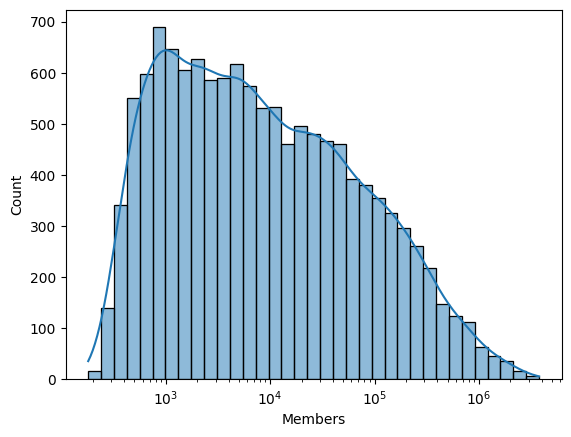

In [331]:
sns.histplot(x='Members', data=anime_df_cleaned, log_scale=True, kde=True);

<Axes: xlabel='Type', ylabel='count'>

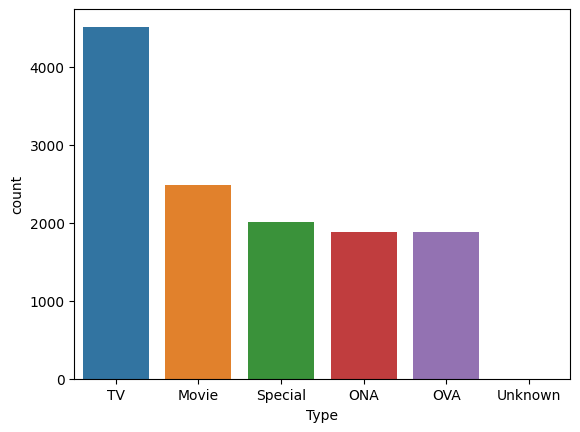

In [332]:
sns.countplot(x='Type', data=anime_df_cleaned)

<Axes: xlabel='Score', ylabel='Count'>

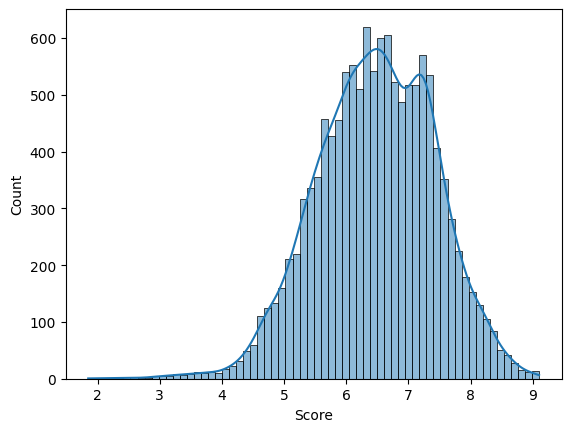

In [333]:
sns.histplot(x='Score', data=anime_df_cleaned, kde=True)

## Conclusion and further experiments

- I have scraped the list of the top 50 anime and mangas but this could be extended much further say for top 1000 anime.
- Selenium or playwright packages could be used to scrape multiple pages at once 
- Visualization and exploratory data analysis could be done easily by extracting multiple pages which could be another project in itself.